# MSDS 460 Discussion 8
Monte Carlo Simulation of a game of chance


Going to play the game "left/right/center" with N people. 

### Rules of the game:
Each player starts with T poker chips. There are two six sided dice:
1. Left
2. Right
3. Center
4. Center
5. Keep 
6. Keep

The player gives a poker chip according to the dice roll; one chip per die. The winner is the last person with chips left.


### Import necessary packages

In [1]:
import numpy as np
from numpy.random import default_rng 
from matplotlib import pyplot as plt
import ipympl

### Define the classes -- dice and games

Set it up so that I can easily repeat a game 

In [2]:
class LRC_dice():
    def __init__(self):
        self.rng = default_rng()
        self.sides = np.array(['Left','Right','Center','Keep'])
        self.probs = np.array([1/6,1/6,1/3,1/3])

    def roll(self):
        return self.rng.choice(self.sides, size = 2, p = self.probs)



class LRC_game():
    def __init__(self, N_players, dice, T_chips):
        ''' game with N_players and LRC_dice instance dice'''

        # the same for every iteration
        self.N_players = N_players # how many players?
        self.T_chips = T_chips # how many does each start with?
        self.dice = dice

        # reinitialized each game
        self.player = 0 # start with player 0
        self.pots = np.ones([N_players,]) * T_chips # the pots of coins
        self.center = 0

    def run(self):
        while np.sum(self.pots > 0) > 1: # while at least two players are in the game
            rolls = self.dice.roll()
            for roll in rolls:
                if self.pots[self.player] > 0: # turn is only valid if we have any chips, can't give away more chips than we have
                    if roll == 'Left':
                        self.pots[self.player] -= 1 # remove a die
                        self.pots[np.mod(self.player-1,self.N_players)] += 1 # add a die to the player to the right
                    if roll == 'Right':
                        self.pots[self.player] -= 1 # remove a die
                        self.pots[np.mod(self.player+1,self.N_players)] += 1 # add a die to the player to the left
                    if roll == 'Center':
                        self.pots[self.player] -= 1 # remove a die
                        self.center += 1 # add a die to the center
            self.player = np.mod(self.player + 1, self.N_players)
        
        self.winner = np.argmax(self.pots)

    def restart(self):
        # reinitialized each game
        self.player = 0 # start with player 0
        self.pots = np.ones([self.N_players,]) * self.T_chips # the pots of coins
        self.center = 0


### Run through X iterations of the game

Let's try 1000 iterations.

In [5]:
# play with 4 players and 6 chips
num_players = 4
num_chips = 6

num_games = 10000

our_dice = LRC_dice()
our_game = LRC_game(num_players, our_dice, num_chips)

game_results = np.ndarray([num_games,2])

for g_num in np.arange(num_games):
    our_game.run()
    game_results[g_num,:] = np.array([our_game.winner, our_game.center])
    our_game.restart()

### Plot a histogram of the winners!

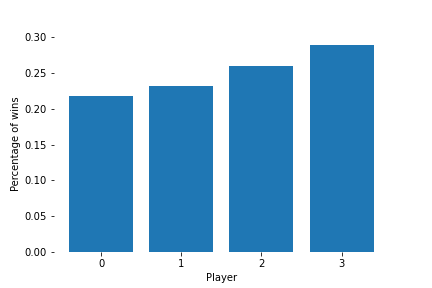

In [6]:
fig, ax = plt.subplots()

ax.hist(game_results[:,0], density=True, bins=np.arange(num_players+1)-.5, rwidth=.8)
ax.set_xlabel('Player')
ax.set_ylabel('Percentage of wins')
ax.set_xticks(np.arange(num_players))

ax.spines[:].set_visible(False)

In [ ]:
np.arange(num_players+1)-.5